In [1]:
# import modules

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import time
import os
from pathlib import Path
import sys
import time

# Simulations dictionary

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:33571 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 1 Memory: 34.36 GB


In [2]:
# Simulations Dictionary

# define dictionary for coloring resolutions
def colordictionary():
    # manually defined colors
    mymaroon= np.array([128,   0,   0])/255
    myred   = np.array([230,  25,  75])/255
    myorange= np.array([245, 130,  48])/255
    mymagenta=np.array([240, 50, 230 ])/255
    myolive = np.array([128, 128,   0])/255
    myteal  = np.array([  0, 128, 128])/255
    myblue  = np.array([  0, 130, 200])/255
    mynavy  = np.array([  0,   0, 128])/255

    return {'80km': mymaroon, '40km': myred, '20km': myorange, '10km': myolive, '5km': myteal, '2km': myblue}

colordict=colordictionary()

# create dictionary for simulations with resolution, start date, convection scheme on/off and microphysics
def simdictionary():
    simdict = {
           'nawdexnwp-80km-mis-0001': {'res':'80km', 'start':'20160922', 'conv':1, 'mphys':1},
           'nawdexnwp-80km-mis-0002': {'res':'80km', 'start':'20160922', 'conv':1, 'mphys':2},
           'nawdexnwp-80km-mis-0003': {'res':'80km', 'start':'20160920', 'conv':1, 'mphys':1},
           'nawdexnwp-80km-mis-0004': {'res':'80km', 'start':'20160920', 'conv':1, 'mphys':2},
           'nawdexnwp-80km-mis-0005': {'res':'80km', 'start':'20160929', 'conv':1, 'mphys':1},
           'nawdexnwp-80km-mis-0006': {'res':'80km', 'start':'20160929', 'conv':1, 'mphys':2},
           'nawdexnwp-80km-mis-0007': {'res':'80km', 'start':'20161002', 'conv':1, 'mphys':1},
           'nawdexnwp-80km-mis-0008': {'res':'80km', 'start':'20161002', 'conv':1, 'mphys':2},
           'nawdexnwp-80km-mis-0009': {'res':'80km', 'start':'20161013', 'conv':1, 'mphys':1},
           'nawdexnwp-80km-mis-0010': {'res':'80km', 'start':'20161013', 'conv':1, 'mphys':2},
           
           'nawdexnwp-40km-mis-0001': {'res':'40km', 'start':'20160922', 'conv':1, 'mphys':1},
           'nawdexnwp-40km-mis-0002': {'res':'40km', 'start':'20160922', 'conv':1, 'mphys':2},
           'nawdexnwp-40km-mis-0003': {'res':'40km', 'start':'20160920', 'conv':1, 'mphys':1},
           'nawdexnwp-40km-mis-0004': {'res':'40km', 'start':'20160920', 'conv':1, 'mphys':2},
           'nawdexnwp-40km-mis-0005': {'res':'40km', 'start':'20160929', 'conv':1, 'mphys':1},
           'nawdexnwp-40km-mis-0006': {'res':'40km', 'start':'20160929', 'conv':1, 'mphys':2},
           'nawdexnwp-40km-mis-0007': {'res':'40km', 'start':'20161002', 'conv':1, 'mphys':1},
           'nawdexnwp-40km-mis-0008': {'res':'40km', 'start':'20161002', 'conv':1, 'mphys':2},
           'nawdexnwp-40km-mis-0009': {'res':'40km', 'start':'20161013', 'conv':1, 'mphys':1},
           'nawdexnwp-40km-mis-0010': {'res':'40km', 'start':'20161013', 'conv':1, 'mphys':2},
                    
           'nawdexnwp-20km-mis-0001': {'res':'20km', 'start':'20160922', 'conv':1, 'mphys':1},
           'nawdexnwp-20km-mis-0002': {'res':'20km', 'start':'20160922', 'conv':1, 'mphys':2},
           'nawdexnwp-20km-mis-0003': {'res':'20km', 'start':'20160920', 'conv':1, 'mphys':1},
           'nawdexnwp-20km-mis-0004': {'res':'20km', 'start':'20160920', 'conv':1, 'mphys':2},
           'nawdexnwp-20km-mis-0005': {'res':'20km', 'start':'20160929', 'conv':1, 'mphys':1},
           'nawdexnwp-20km-mis-0006': {'res':'20km', 'start':'20160929', 'conv':1, 'mphys':2},
           'nawdexnwp-20km-mis-0007': {'res':'20km', 'start':'20161002', 'conv':1, 'mphys':1},
           'nawdexnwp-20km-mis-0008': {'res':'20km', 'start':'20161002', 'conv':1, 'mphys':2},
           'nawdexnwp-20km-mis-0009': {'res':'20km', 'start':'20161013', 'conv':1, 'mphys':1},
           'nawdexnwp-20km-mis-0010': {'res':'20km', 'start':'20161013', 'conv':1, 'mphys':2},
           
           'nawdexnwp-10km-mis-0001': {'res':'10km', 'start':'20160922', 'conv':1, 'mphys':1},
           'nawdexnwp-10km-mis-0002': {'res':'10km', 'start':'20160922', 'conv':1, 'mphys':2},
           'nawdexnwp-10km-mis-0003': {'res':'10km', 'start':'20160922', 'conv':0, 'mphys':1},
           'nawdexnwp-10km-mis-0004': {'res':'10km', 'start':'20160922', 'conv':0, 'mphys':2},
           'nawdexnwp-10km-mis-0005': {'res':'10km', 'start':'20160920', 'conv':1, 'mphys':1},
           'nawdexnwp-10km-mis-0006': {'res':'10km', 'start':'20160920', 'conv':1, 'mphys':2},
           'nawdexnwp-10km-mis-0007': {'res':'10km', 'start':'20160929', 'conv':1, 'mphys':1},
           'nawdexnwp-10km-mis-0008': {'res':'10km', 'start':'20160929', 'conv':1, 'mphys':2},
           'nawdexnwp-10km-mis-0009': {'res':'10km', 'start':'20161002', 'conv':1, 'mphys':1},
           'nawdexnwp-10km-mis-0010': {'res':'10km', 'start':'20161002', 'conv':1, 'mphys':2},
           'nawdexnwp-10km-mis-0011': {'res':'10km', 'start':'20161013', 'conv':1, 'mphys':1},
           'nawdexnwp-10km-mis-0012': {'res':'10km', 'start':'20161013', 'conv':1, 'mphys':2},
           
           'nawdexnwp-5km-mis-0001':  {'res':'5km', 'start':'20160922', 'conv':1, 'mphys':1},
           'nawdexnwp-5km-mis-0002':  {'res':'5km', 'start':'20160922', 'conv':1, 'mphys':2},
           'nawdexnwp-5km-mis-0003':  {'res':'5km', 'start':'20160922', 'conv':0, 'mphys':1},
           'nawdexnwp-5km-mis-0004':  {'res':'5km', 'start':'20160922', 'conv':0, 'mphys':2},
           'nawdexnwp-5km-mis-0005':  {'res':'5km', 'start':'20160920', 'conv':1, 'mphys':1},
           'nawdexnwp-5km-mis-0006':  {'res':'5km', 'start':'20160920', 'conv':1, 'mphys':2},
           'nawdexnwp-5km-mis-0007':  {'res':'5km', 'start':'20160929', 'conv':1, 'mphys':1},
           'nawdexnwp-5km-mis-0008':  {'res':'5km', 'start':'20160929', 'conv':1, 'mphys':2},
           'nawdexnwp-5km-mis-0009':  {'res':'5km', 'start':'20161002', 'conv':1, 'mphys':1},
           'nawdexnwp-5km-mis-0010':  {'res':'5km', 'start':'20161002', 'conv':1, 'mphys':2},
           'nawdexnwp-5km-mis-0011':  {'res':'5km', 'start':'20161013', 'conv':1, 'mphys':1},
          'nawdexnwp-5km-mis-0012':  {'res':'5km', 'start':'20161013', 'conv':1, 'mphys':2},
           
           'nawdexnwp-2km-mis-0001':  {'res':'2km', 'start':'20160922', 'conv':0, 'mphys':1},
           'nawdexnwp-2km-mis-0002':  {'res':'2km', 'start':'20160922', 'conv':0, 'mphys':2},
           'nawdexnwp-2km-mis-0003':  {'res':'2km', 'start':'20160922', 'conv':1, 'mphys':1},
           'nawdexnwp-2km-mis-0004':  {'res':'2km', 'start':'20160922', 'conv':1, 'mphys':2},
           'nawdexnwp-2km-mis-0005':  {'res':'2km', 'start':'20160920', 'conv':0, 'mphys':1},
           'nawdexnwp-2km-mis-0006':  {'res':'2km', 'start':'20160920', 'conv':0, 'mphys':2},
           'nawdexnwp-2km-mis-0007':  {'res':'2km', 'start':'20160929', 'conv':0, 'mphys':1},
           'nawdexnwp-2km-mis-0008':  {'res':'2km', 'start':'20160929', 'conv':0, 'mphys':2},
           'nawdexnwp-2km-mis-0009':  {'res':'2km', 'start':'20161002', 'conv':0, 'mphys':1},
            'nawdexnwp-2km-mis-0010':  {'res':'2km', 'start':'20161002', 'conv':0, 'mphys':2},
            'nawdexnwp-2km-mis-0011':  {'res':'2km', 'start':'20161013', 'conv':0, 'mphys':1},
            'nawdexnwp-2km-mis-0012':  {'res':'2km', 'start':'20161013', 'conv':0, 'mphys':2},
        
           # simulations with only shallow convection scheme enabled
           'nawdexnwp-2km-mis-0001-shcon':  {'res':'2km', 'start':'20160922', 'conv':2, 'mphys':1},
           'nawdexnwp-2km-mis-0002-shcon':  {'res':'2km', 'start':'20160922', 'conv':2, 'mphys':2},
           'nawdexnwp-2km-mis-0005-shcon':  {'res':'2km', 'start':'20160920', 'conv':2, 'mphys':1},
           'nawdexnwp-2km-mis-0006-shcon':  {'res':'2km', 'start':'20160920', 'conv':2, 'mphys':2},
           'nawdexnwp-2km-mis-0007-shcon':  {'res':'2km', 'start':'20160929', 'conv':2, 'mphys':1},
           'nawdexnwp-2km-mis-0008-shcon':  {'res':'2km', 'start':'20160929', 'conv':2, 'mphys':2},
           'nawdexnwp-2km-mis-0009-shcon':  {'res':'2km', 'start':'20161002', 'conv':2, 'mphys':1},
           'nawdexnwp-2km-mis-0010-shcon':  {'res':'2km', 'start':'20161002', 'conv':2, 'mphys':2},
           'nawdexnwp-2km-mis-0011-shcon':  {'res':'2km', 'start':'20161013', 'conv':2, 'mphys':1},
           'nawdexnwp-2km-mis-0012-shcon':  {'res':'2km', 'start':'20161013', 'conv':2, 'mphys':2}
          }


    return simdict

simdict   = simdictionary()
# Grid names for different resolutions  
grids = ['R80000m','R40000m','R20000m','R10000m','R5000m','R2500m']

## Loading simulations and creating mean datasets

# for 3dcloud

In [3]:
# Variables. Loading, masking, domain_mean (looping through time steps), daily mean and saving to nc file 

# Settings for running this function: Compute 64GB, 24 node, whit dask configuration
# Multiple files, time step looping

def load_iconnwp_data():
    
    ds_list = []
    
    # looping through simulations
    for sim in list(simdict.keys()):
        
        print('Working on loading data for', sim)
        path = '/work/bb1018/b380459/NAWDEX/ICON_OUTPUT_NWP/'
        
        # Create a list to extract time steps from datasets
        tstep_list = []
        
        for i in Path('/work/bb1018/b380459/NAWDEX/ICON_OUTPUT_NWP/'+sim).rglob(sim+'_2016*_3dcloud_DOM01_ML_*.nc'): 
            tstep_list.append(str(i).split('/')[-1].split('_')[5].split('.')[0]) #change datasets
            tstep_list.sort(key=int)
        
        # loading open_ocean masking datasets
        #fname = '/work/bb1018/nawdex-hackathon_pp/'+'openoceanmask/'+sim+'_openoceanmask.nc'
        #fname = path+'openocean_masks/'+sim.replace('-shcon', '')+'_openoceanmask.nc'
        fname = '/work/bb1018/nawdex-hackathon_pp/'+'openoceanmask/'+sim.split('-shcon')[-2]+'_openoceanmask.nc'
        ds_om = xr.open_dataset(fname)['mask_openocean']
        index = np.where(ds_om==1)[0]
        
        # loading related grid files for domain mean calculations  
        
        if simdict[sim]['res'] == '80km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[0]+'.nc'
        elif simdict[sim]['res'] == '40km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[1]+'.nc'
        elif simdict[sim]['res'] == '20km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[2]+'.nc'
        elif simdict[sim]['res'] == '10km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[3]+'.nc'
        elif simdict[sim]['res'] == '5km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[4]+'.nc'
        elif simdict[sim]['res'] == '2km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[5]+'.nc'
            
        dg = ( xr.open_dataset(fname1)[['cell_area','clat','clon','clon_vertices','clat_vertices','vlon','vlat','vertex_of_cell', 'vertex']].rename({'cell': 'ncells'}))
        # we need to subtract -1 from vertex_of_cell as python starts counting at 0, but fortran starts at 1
        dg['vertex_of_cell'] = dg['vertex_of_cell'] - 1
            
        # open_ocean mascking grid files
        
        dg = dg.isel(ncells=index)
        
        # Create a list to concat datasets with time dimension
        
        ds_t=[]
        
        # looping through time step for loading datasets
        for tstep in tstep_list:
            
            # choose datasets
            
            ds = xr.open_mfdataset(path+'/'+sim+'/'+sim+'_2016*_3dcloud_DOM01_ML_'+str(tstep).zfill(4)+'.nc',
                                combine='by_coords', parallel=True, 
                                engine='h5netcdf', chunks={'ncells': 1e6} )[['clc','tot_qv_dia','tot_qc_dia','tot_qi_dia']] #'time': 1 #change datasets
            
            
            
            # open_ocean masking dataset
            ds = ds.isel(ncells=index)
            
            # Domain mean
            weights=dg['cell_area']/(dg['cell_area']).sum(dim=['ncells'])
            ds = (ds*weights).sum(dim=['ncells'])

            # Cancating time steps into 1 dataset for each simulation
            
            ds_t.append(ds)
            ds_c = xr.concat(ds_t, dim="time")
            
        # Saving to nc files
        
        ds_c.attrs['simulation'] = sim
        
        ds_c.to_netcdf('/work/bb1018/b380723/hackathon/3dcloud/3dcloud_'+sim+'.nc')
        #ds_list.append(ds_c)
        
        del ds, ds_om, index, dg, ds_t ,tstep_list, ds_c
            
    return ds_list
    

In [ ]:
# Executing the upper function
#4:00 _ 
tt=time.process_time()

ds_icon_list = load_iconnwp_data()

print('Time taken:', time.process_time() - tt,'seconds')

# for fg

In [4]:
# ## Different datasets

# In[8]:


# Variables. Loading, masking, domain_mean (looping through time steps), daily mean and saving to nc file 

# Settings for running this function: Compute 64GB, 24 node, whit dask configuration
# Multiple files, time step looping

def load_iconnwp_data():
    
    ds_list = []
    
    # looping through simulations
    for sim in list(simdict.keys()):
        
        print('Working on loading data for', sim)
        path = '/work/bb1018/b380459/NAWDEX/ICON_OUTPUT_NWP/'
        
        # Create a list to extract time steps from datasets
        tstep_list = []
        
        for i in Path('/work/bb1018/b380459/NAWDEX/ICON_OUTPUT_NWP/'+sim).rglob(sim+'_2016*_fg_DOM01_ML_*.nc'): 
            tstep_list.append(str(i).split('/')[-1].split('_')[5].split('.')[0]) #change datasets
            tstep_list.sort(key=int)
        
        # loading open_ocean masking datasets
        fname = '/work/bb1018/nawdex-hackathon_pp/'+'openoceanmask/'+sim+'_openoceanmask.nc'
        #fname = path+'openocean_masks/'+sim.replace('-shcon', '')+'_openoceanmask.nc'
        #fname = '/work/bb1018/nawdex-hackathon_pp/'+'openoceanmask/'+sim.split('-shcon')[-2]+'_openoceanmask.nc'
        ds_om = xr.open_dataset(fname)['mask_openocean']
        index = np.where(ds_om==1)[0]
        
        # loading related grid files for domain mean calculations  
        
        if simdict[sim]['res'] == '80km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[0]+'.nc'
        elif simdict[sim]['res'] == '40km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[1]+'.nc'
        elif simdict[sim]['res'] == '20km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[2]+'.nc'
        elif simdict[sim]['res'] == '10km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[3]+'.nc'
        elif simdict[sim]['res'] == '5km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[4]+'.nc'
        elif simdict[sim]['res'] == '2km':
            fname1 = '/work/bb1018/b380459/NAWDEX'+'/grids/icon-grid_nawdex_78w40e23n80n_'+grids[5]+'.nc'
            
        dg = ( xr.open_dataset(fname1)[['cell_area','clat','clon','clon_vertices','clat_vertices','vlon','vlat','vertex_of_cell', 'vertex']].rename({'cell': 'ncells'}))
        # we need to subtract -1 from vertex_of_cell as python starts counting at 0, but fortran starts at 1
        dg['vertex_of_cell'] = dg['vertex_of_cell'] - 1
            
        # open_ocean mascking grid files
        
        dg = dg.isel(ncells=index)
        
        # Create a list to concat datasets with time dimension
        
        ds_t=[]
        
        # looping through time step for loading datasets
        for tstep in tstep_list:
            
            # choose datasets
            
            ds = xr.open_mfdataset(path+'/'+sim+'/'+sim+'_2016*_fg_DOM01_ML_'+str(tstep).zfill(4)+'.nc',
                                combine='by_coords', parallel=True, 
                                 chunks={'ncells_2': 1e6} )[['qc','qi']].rename({'ncells_2': 'ncells'}) #'time': 1 #change datasets
            
            
            
            # open_ocean masking dataset
            ds = ds.isel(ncells=index)
            
            # Domain mean
            weights=dg['cell_area']/(dg['cell_area']).sum(dim=['ncells'])
            ds = (ds*weights).sum(dim=['ncells'])

            # Cancating time steps into 1 dataset for each simulation
            
            ds_t.append(ds)
            ds_c = xr.concat(ds_t, dim="time")
            
        # Saving to nc files
        
        ds_c.attrs['simulation'] = sim
        
        ds_c.to_netcdf('/work/bb1018/b380723/hackathon/fg/fg_'+sim+'.nc')
        #ds_list.append(ds_c)
        
        del ds, ds_om, index, dg, ds_t ,tstep_list, ds_c
            
    return ds_list

In [ ]:
# In[ ]:


# Executing the upper function
#4:00 _ 
tt=time.process_time()

ds_icon_list = load_iconnwp_data()

print('Time taken:', time.process_time() - tt,'seconds')

## Plot

# plot for one period

0 tot_qc_dia
1 tot_qi_dia
2 clc


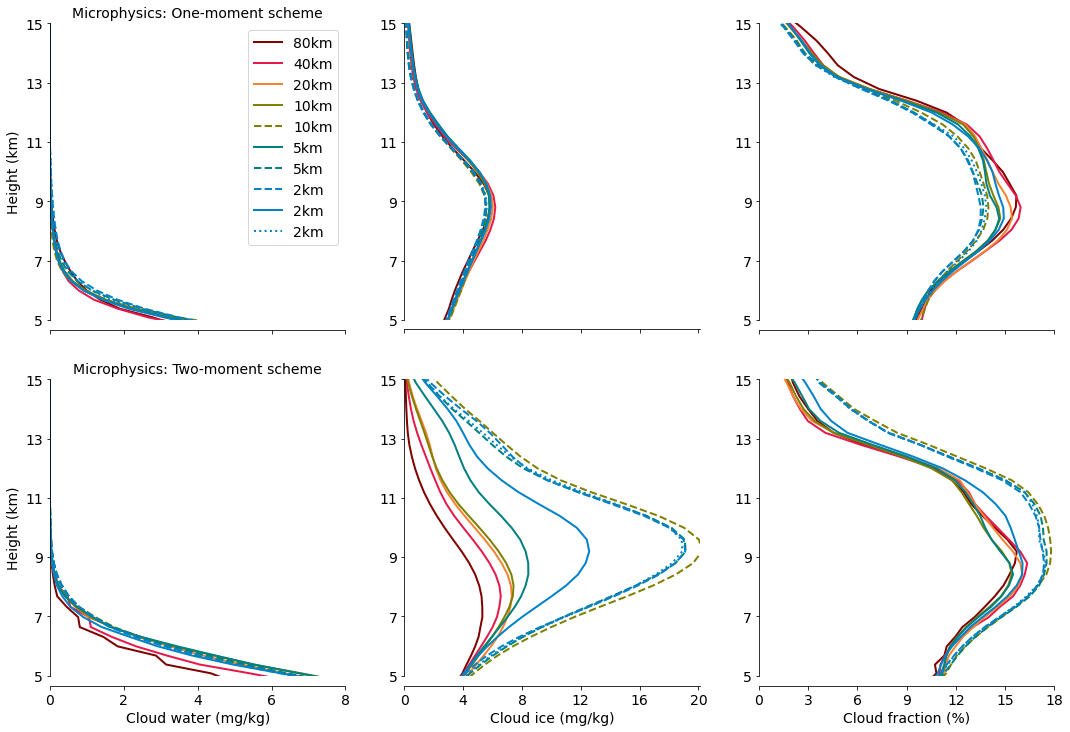

In [16]:
sim_set_new1 = []

for sim in list(simdict.keys()):
    path = '/xdisk/sylvia/nawdex-hackathon/clc-qc-qi/3dcloud/'
    
    if simdict[sim]['start'] == '20160922':
        
        ds = xr.open_dataset(path+'3dcloud_'+sim+'.nc')
        ds['tot_qc_dia'] = ds['tot_qc_dia']*1e6
        ds['tot_qi_dia'] = ds['tot_qi_dia']*1e6

        ds.attrs['simulation'] = sim

        sim_set_new1.append(ds)
        del sim 
    
#print( len(sim_set_new1) )
###################################################
def select_analysis_days(ds, expid):
    
    import sys
    sys.path.append('/xdisk/sylvia/nawdex-hackathon/shared')

    import dict_nawdexsims
    simdict     = dict_nawdexsims.simdictionary()
    anadaysdict = dict_nawdexsims.anadaysdictionary()
    
    startday  = simdict[expid]['start']
    anadays   = anadaysdict[startday]
    
    return ds.sel(time=slice(anadays[0], anadays[-1]))

sim_set_new = []
for i in range(len(sim_set_new1)):
    test=select_analysis_days(sim_set_new1[i], sim_set_new1[i].attrs['simulation'])
    sim_set_new.append(test)

##########getting height values for y-axis############
data=xr.open_dataset('/xdisk/sylvia/nawdex-hackathon/domain-mean/nawdexnwp-80km-mis-0001_2016092200_fg_DOM01_ML_0036.nc')
data['z_ifc']=data['z_ifc'].diff('height_3', label='lower')/2+data['z_ifc'][:-1,:]
data['z_ifc']=data['z_ifc'].rename({'height_3': 'height'})
height=data['z_ifc'].isel(ncells_2=0)
#################################################

#######for adjusting spines#########
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
####################################


def plot_thmean(_ds_icon_list, _var,num):
    ax = fig.add_subplot(2,3,num)
    for ds in _ds_icon_list:
        # make sure that _var is part of dataset
        if _var not in ds.keys():
            continue
        # get plotting color according to resolution
                # get plotting color according to resolution
        pcolor=colordict[simdict[ds.attrs['simulation']]['res']]
        # get linestyle according to convection scheme
        conv = simdict[ds.attrs['simulation']]['conv']
        if conv==0:
            lstyle='--'
        elif conv==1:
            lstyle='-'
        elif conv==2:
            lstyle=':'
        mphys = simdict[ds.attrs['simulation']]['mphys']
        if mphys==1:
            
            ax = fig.add_subplot(2,3,num)
            #ndays = ds[_var].resample(time='1D').mean('time').time.size
            #line = ds[_var].resample(time='1D').mean('time')[1:ndays-1].mean('time')
            line = ds[_var].mean('time')
            plt.plot(line.values,height/1e3,color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            plt.tick_params(labelsize=13)
            #plt.ylabel("Height (km)",fontsize=14)
            if num == 1:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,8)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                plt.xlim(0,8)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                plt.title('Microphysics: One-moment scheme',fontsize=14)
                #plt.xlabel('tot_qc_dia',fontsize=14)
                plt.legend(fontsize=14)
                plt.ylabel("Height (km)",fontsize=14)
                adjust_spines(ax,['bottom'])
                ax.axes.xaxis.set_ticklabels([])
            if num+3 == 5:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,20.1)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,20.1)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                ax.xaxis.set_ticks([0,4,8,12,16,20])
                ax.xaxis.set_ticklabels([0,4,8,12,16,20])
                ax.spines['bottom'].set_position(('axes', -0.03))
                #adjust_spines(ax,['bottom'])
                #plt.xlabel('tot_qi_dia (mg/kg)',fontsize=14)
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                ax.tick_params(axis='x', labelsize=14)
                ax.axes.xaxis.set_ticklabels([])
            if num == 3:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,18)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,18)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                ax.xaxis.set_ticks([0,3,6,9,12,15,18])
                ax.xaxis.set_ticklabels([0,3,6,9,12,15,18])
                #plt.xlabel('clc (%)',fontsize=14)
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                adjust_spines(ax,['bottom'])
                ax.axes.xaxis.set_ticklabels([])
            
        elif mphys==2:
                                        
            ax = fig.add_subplot(2,3,num+3)
            #time = ds[_var].time.resample(time='1D').mean('time')[1:ndays-1]
            #line = ds[_var].resample(time='1D').mean('time')[1:ndays-1].mean('time')
            line = ds[_var].mean('time')
            plt.plot(line.values,height/1e3,color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            plt.tick_params(labelsize=13)
            #plt.ylabel("Height (km)",fontsize=14)
            #plt.xticks(np.arange(-1,1.5,0.5))
            if num+3 == 4:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,8)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,8)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                plt.title('Microphysics: Two-moment scheme',fontsize=14)
                plt.xlabel('Cloud water (mg/kg)',fontsize=14)
                plt.ylabel("Height (km)",fontsize=14)
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.legend(fontsize=14)
                adjust_spines(ax,['bottom'])
                ax.tick_params(axis='x', labelsize=14)
            if num+3 == 5:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,20.1)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,20.1)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                ax.xaxis.set_ticks([0,4,8,12,16,20])
                ax.xaxis.set_ticklabels([0,4,8,12,16,20])
                plt.xlabel('Cloud ice (mg/kg)',fontsize=14)
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                adjust_spines(ax,['bottom'])
                ax.tick_params(axis='x', labelsize=14)
            if num+3 == 6:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,18)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,18)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                ax.xaxis.set_ticks([0,3,6,9,12,15,18])
                ax.xaxis.set_ticklabels([0,3,6,9,12,15,18])
                plt.xlabel('Cloud fraction (%)',fontsize=14)
                adjust_spines(ax,['bottom'])
                ax.tick_params(axis='x', labelsize=14)
                
###########

fig=plt.figure(figsize=(18,12)) #18,12
ax = fig
for i, var in enumerate(['tot_qc_dia','tot_qi_dia','clc']):
    print(i,var)
    plot_thmean(sim_set_new, var, i+1)
    #plt.savefig('qc-qi-clc_vertical_profile_Sept22.png', bbox_inches = 'tight', dpi=600)

#############

# climatology plot including era5

In [23]:
import metpy.calc
from metpy.units import units
ds3=xr.open_dataset('/work/bb1018/b380723/hackathon/era5/timmean_fldmean_ocean_data_sellonlatbox_era5_geopotential.nc')
height_era = metpy.calc.geopotential_to_height(ds3.Z.squeeze(('time', 'lat', 'lon')))

#####opening file containing masked value####
weighted_mean_xr=xr.open_dataset('weighted_mean_xr.nc')
era=weighted_mean_xr
era['tot_qc_dia']=era['CLWC']*1e6
era['tot_qi_dia']=era['CLWC']*1e6
era['clc']=era['CC']*1e2
era=era[['tot_qc_dia','tot_qi_dia','clc']]

In [24]:
sim_set_3 = []

for sim in list(simdict.keys()):
    path = '/work/bb1018/nawdex-hackathon_pp/clc-qc-qi/3dcloud/'
    
    #if simdict[sim]['start'] == '20160920':
        
    ds = xr.open_dataset(path+'3dcloud_'+sim+'.nc')
    ds['tot_qc_dia'] = ds['tot_qc_dia']*1e6
    ds['tot_qi_dia'] = ds['tot_qi_dia']*1e6
    
    ds.attrs['simulation'] = sim

    sim_set_3.append(ds)
    del sim
    

def select_analysis_days(ds, expid):
    
    import sys
    sys.path.append('/pf/b/b380459/nawdex-hackathon/shared')

    import dict_nawdexsims
    simdict     = dict_nawdexsims.simdictionary()
    anadaysdict = dict_nawdexsims.anadaysdictionary()
    
    startday  = simdict[expid]['start']
    anadays   = anadaysdict[startday]
    
    return ds.sel(time=slice(anadays[0], anadays[-1]))


sim_set_4 = []
for i in range(len(sim_set_3)):
    test=select_analysis_days(sim_set_3[i], sim_set_3[i].attrs['simulation'])
    sim_set_4.append(test)

In [25]:
# 80 & 40 & 20 Km

# 80
ds_merge1 = []
ds_merge2 = []

for i in range(len(sim_set_4)):
    conv = simdict[sim_set_4[i].attrs['simulation']]['conv']
    mphys = simdict[sim_set_4[i].attrs['simulation']]['mphys']
    res = simdict[sim_set_4[i].attrs['simulation']]['res']
        
    if conv == 1 and mphys ==1 and res=='80km':
        #print(sim_set_4[i].attrs)
        ds_merge1.append(sim_set_4[i])
        ds_c1m1_80 = xr.concat(ds_merge1,dim='time')
        #del ds_merge
        
    elif conv == 1 and mphys ==2 and res=='80km':
        #print(sim_set_4[i].attrs)
        ds_merge2.append(sim_set_4[i])
        ds_c1m2_80 = xr.concat(ds_merge2,dim='time')
        
# 40
ds_merge1 = []
ds_merge2 = []

for i in range(len(sim_set_4)):
    conv = simdict[sim_set_4[i].attrs['simulation']]['conv']
    mphys = simdict[sim_set_4[i].attrs['simulation']]['mphys']
    res = simdict[sim_set_4[i].attrs['simulation']]['res']
        
    if conv == 1 and mphys ==1 and res=='40km':
        #print(sim_set_4[i].attrs)
        ds_merge1.append(sim_set_4[i])
        ds_c1m1_40 = xr.concat(ds_merge1,dim='time')
        #del ds_merge
        
    elif conv == 1 and mphys ==2 and res=='40km':
        #print(sim_set_4[i].attrs)
        ds_merge2.append(sim_set_4[i])
        ds_c1m2_40 = xr.concat(ds_merge2,dim='time')

#20
ds_merge1 = []
ds_merge2 = []

for i in range(len(sim_set_4)):
    conv = simdict[sim_set_4[i].attrs['simulation']]['conv']
    mphys = simdict[sim_set_4[i].attrs['simulation']]['mphys']
    res = simdict[sim_set_4[i].attrs['simulation']]['res']
        
    if conv == 1 and mphys ==1 and res=='20km':
        #print(sim_set_4[i].attrs)
        ds_merge1.append(sim_set_4[i])
        ds_c1m1_20 = xr.concat(ds_merge1,dim='time')
        #del ds_merge
        
    elif conv == 1 and mphys ==2 and res=='20km':
        #print(sim_set_4[i].attrs)
        ds_merge2.append(sim_set_4[i])
        ds_c1m2_20 = xr.concat(ds_merge2,dim='time')
        

# 10 & 5 Km
#10km
ds_merge1 = []
ds_merge2 = []
ds_merge3 = []
ds_merge4 = []

for i in range(len(sim_set_4)):
    conv = simdict[sim_set_4[i].attrs['simulation']]['conv']
    mphys = simdict[sim_set_4[i].attrs['simulation']]['mphys']
    res = simdict[sim_set_4[i].attrs['simulation']]['res']
        
    if conv == 1 and mphys ==1 and res=='10km':
        #print(sim_set_4[i].attrs)
        ds_merge1.append(sim_set_4[i])
        ds_c1m1_10 = xr.concat(ds_merge1,dim='time')
        #del ds_merge
        
    elif conv == 1 and mphys ==2 and res=='10km':
        #print(sim_set_4[i].attrs)
        ds_merge2.append(sim_set_4[i])
        ds_c1m2_10 = xr.concat(ds_merge2,dim='time')
        
#     elif conv ==0 and mphys ==1 and res=='10km':
#         #print(sim_set_4[i].attrs)
#         ds_merge3.append(sim_set_4[i])
#         ds_c0m1_10 = xr.concat(ds_merge3,dim='time')
        
#     elif conv == 0 and mphys ==2 and res=='10km':
#         #print(sim_set_4[i].attrs)
#         ds_merge4.append(sim_set_4[i])
#         ds_c0m2_10 = xr.concat(ds_merge4,dim='time') 
        
#5km
ds_merge1 = []
ds_merge2 = []
ds_merge3 = []
ds_merge4 = []

for i in range(len(sim_set_4)):
    conv = simdict[sim_set_4[i].attrs['simulation']]['conv']
    mphys = simdict[sim_set_4[i].attrs['simulation']]['mphys']
    res = simdict[sim_set_4[i].attrs['simulation']]['res']
        
    if conv == 1 and mphys ==1 and res=='5km':
        #print(sim_set_4[i].attrs)
        ds_merge1.append(sim_set_4[i])
        ds_c1m1_5 = xr.concat(ds_merge1,dim='time')
        #del ds_merge
        
    elif conv == 1 and mphys ==2 and res=='5km':
        #print(sim_set_4[i].attrs)
        ds_merge2.append(sim_set_4[i])
        ds_c1m2_5 = xr.concat(ds_merge2,dim='time')
        
#     elif conv ==0 and mphys ==1 and res=='5km':
#         #print(sim_set_4[i].attrs)
#         ds_merge3.append(sim_set_4[i])
#         ds_c0m1_5 = xr.concat(ds_merge3,dim='time')
        
#     elif conv == 0 and mphys ==2 and res=='5km':
#         #print(sim_set_4[i].attrs)
#         ds_merge4.append(sim_set_4[i])
#         ds_c0m2_5 = xr.concat(ds_merge4,dim='time')    
        
        
# 2.5 Km
ds_merge1 = []
ds_merge2 = []
ds_merge3 = []
ds_merge4 = []
ds_merge5 = []
ds_merge6 = []

for i in range(len(sim_set_4)):
    conv = simdict[sim_set_4[i].attrs['simulation']]['conv']
    mphys = simdict[sim_set_4[i].attrs['simulation']]['mphys']
    res = simdict[sim_set_4[i].attrs['simulation']]['res']
        
#     if conv == 1 and mphys ==1 and res=='2km':
#         #print(sim_set_4[i].attrs)
#         ds_merge1.append(sim_set_4[i])
#         ds_c1m1_2 = xr.concat(ds_merge1,dim='time')
#         #del ds_merge
        
#     elif conv == 1 and mphys ==2 and res=='2km':
#         #print(sim_set_4[i].attrs)
#         ds_merge2.append(sim_set_4[i])
#         ds_c1m2_2 = xr.concat(ds_merge2,dim='time')
        
    if conv ==0 and mphys ==1 and res=='2km':
        #print(sim_set_4[i].attrs)
        ds_merge3.append(sim_set_4[i])
        ds_c0m1_2 = xr.concat(ds_merge3,dim='time')
        
    elif conv == 0 and mphys ==2 and res=='2km':
        #print(sim_set_4[i].attrs)
        ds_merge4.append(sim_set_4[i])
        ds_c0m2_2 = xr.concat(ds_merge4,dim='time')
        
    elif conv ==2 and mphys ==1 and res=='2km':
        #print(sim_set_4[i].attrs)
        ds_merge5.append(sim_set_4[i])
        ds_c2m1_2 = xr.concat(ds_merge5,dim='time')
        
    elif conv == 2 and mphys ==2 and res=='2km':
        #print(sim_set_4[i].attrs)
        ds_merge6.append(sim_set_4[i])
        ds_c2m2_2 = xr.concat(ds_merge6,dim='time')
        
        
ds_list_new=[ds_c1m1_80,ds_c1m2_80,ds_c1m1_40,ds_c1m2_40,ds_c1m1_20,ds_c1m2_20,
             ds_c1m1_10,ds_c1m2_10,
             ds_c1m1_5,ds_c1m2_5,
             ds_c0m1_2,ds_c0m2_2,ds_c2m1_2,ds_c2m2_2]

In [26]:
#####################getting height values for y-axis############
data=xr.open_dataset('/work/bb1018/b380459/NAWDEX/ICON_OUTPUT_NWP/nawdexnwp-80km-mis-0001/nawdexnwp-80km-mis-0001_2016092200_fg_DOM01_ML_0078.nc')
data['z_ifc']=data['z_ifc'].diff('height_3', label='lower')/2+data['z_ifc'][:-1,:]
data['z_ifc']=data['z_ifc'].rename({'height_3': 'height'})
height=data['z_ifc'].isel(ncells_2=0)

#######for adjusting spines#########
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
####################################

def plot_thmean(_ds_icon_list, _var,num):
    ax = fig.add_subplot(2,3,num)
    for ds in _ds_icon_list:
        # make sure that _var is part of dataset
        if _var not in ds.keys():
            continue
        # get plotting color according to resolution
                # get plotting color according to resolution
        pcolor=colordict[simdict[ds.attrs['simulation']]['res']]
        # get linestyle according to convection scheme
        conv = simdict[ds.attrs['simulation']]['conv']
        if conv==0:
            lstyle='--'
        elif conv==1:
            lstyle='-'
        elif conv==2:
            lstyle=':'
        mphys = simdict[ds.attrs['simulation']]['mphys']
        if mphys==1:
            
            ax = fig.add_subplot(2,3,num)
            #ndays = ds[_var].resample(time='1D').mean('time').time.size
            #line = ds[_var].resample(time='1D').mean('time')[1:ndays-1].mean('time')
            line = ds[_var].mean('time')
            plt.plot(line.values,height/1e3,color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            plt.tick_params(labelsize=13)
            #plt.ylabel("Height (km)",fontsize=14)
            if num == 1:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,5)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                plt.xlim(0,5)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                plt.title('Microphysics: One-moment scheme',fontsize=14)
                #plt.xlabel('tot_qc_dia',fontsize=14)
                plt.legend(fontsize=14,frameon=False)
                plt.ylabel("Height (km)",fontsize=14)
                adjust_spines(ax,['bottom'])
                ax.axes.xaxis.set_ticklabels([])
                plt.plot(weighted_mean_xr.CLWC.mean('time').values*1e6,height_era/1e3,color='black', linewidth=2,label='ERA5_0.25deg')
    
            if num+3 == 5:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,12)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,12)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                ax.spines['bottom'].set_position(('axes', -0.03))
                #adjust_spines(ax,['bottom'])
                #plt.xlabel('tot_qi_dia (mg/kg)',fontsize=14)
                plt.ylabel("")
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                ax.tick_params(axis='x', labelsize=14)
                ax.axes.xaxis.set_ticklabels([])
                plt.plot(weighted_mean_xr.CIWC.mean('time').values*1e6,height_era/1e3,color='black', linewidth=2)
            if num == 3:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,15)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,15)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                ax.xaxis.set_ticks([0,3,6,9,12,15])
                ax.xaxis.set_ticklabels([0,3,6,9,12,15])
                #plt.xlabel('clc (%)',fontsize=14)
                plt.ylabel("")
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                adjust_spines(ax,['bottom'])
                ax.axes.xaxis.set_ticklabels([])
                plt.plot(weighted_mean_xr.CC.mean('time').values*1e2,height_era/1e3,color='black', linewidth=2)
            
        elif mphys==2:
                                        
            ax = fig.add_subplot(2,3,num+3)
            #time = ds[_var].time.resample(time='1D').mean('time')[1:ndays-1]
            #line = ds[_var].resample(time='1D').mean('time')[1:ndays-1].mean('time')
            line = ds[_var].mean('time')
            plt.plot(line.values,height/1e3,color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            plt.tick_params(labelsize=13)
            #plt.ylabel("Height (km)",fontsize=14)
            #plt.xticks(np.arange(-1,1.5,0.5))
            if num+3 == 4:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,5)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,5)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                plt.title('Microphysics: Two-moment scheme',fontsize=14)
                plt.xlabel('Cloud water (mg/kg)',fontsize=14)
                plt.ylabel("Height (km)",fontsize=14)
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.legend(fontsize=14)
                adjust_spines(ax,['bottom'])
                ax.tick_params(axis='x', labelsize=14)
                plt.plot(weighted_mean_xr.CLWC.mean('time').values*1e6,height_era/1e3,color='black', linewidth=2)
            if num+3 == 5:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,12)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,12)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                plt.xlabel('Cloud ice (mg/kg)',fontsize=14)
                plt.ylabel("")
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                adjust_spines(ax,['bottom'])
                ax.tick_params(axis='x', labelsize=14)
                plt.plot(weighted_mean_xr.CIWC.mean('time').values*1e6,height_era/1e3,color='black', linewidth=2)
            if num+3 == 6:
                ax.spines['left'].set_bounds(5,15)
                ax.spines['bottom'].set_bounds(0,15)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                plt.xlim(0,15)
                plt.ylim(5,15)
                ax.yaxis.set_ticks([5,7,9,11,13,15])
                ax.yaxis.set_ticklabels([5,7,9,11,13,15], fontsize=14)
                ax.xaxis.set_ticks([0,3,6,9,12,15])
                ax.xaxis.set_ticklabels([0,3,6,9,12,15])
                plt.xlabel('Cloud fraction (%)',fontsize=14)
                plt.ylabel("")
                adjust_spines(ax,['bottom'])
                ax.tick_params(axis='x', labelsize=14)
                plt.plot(weighted_mean_xr.CC.mean('time').values*1e2,height_era/1e3,color='black', linewidth=2)

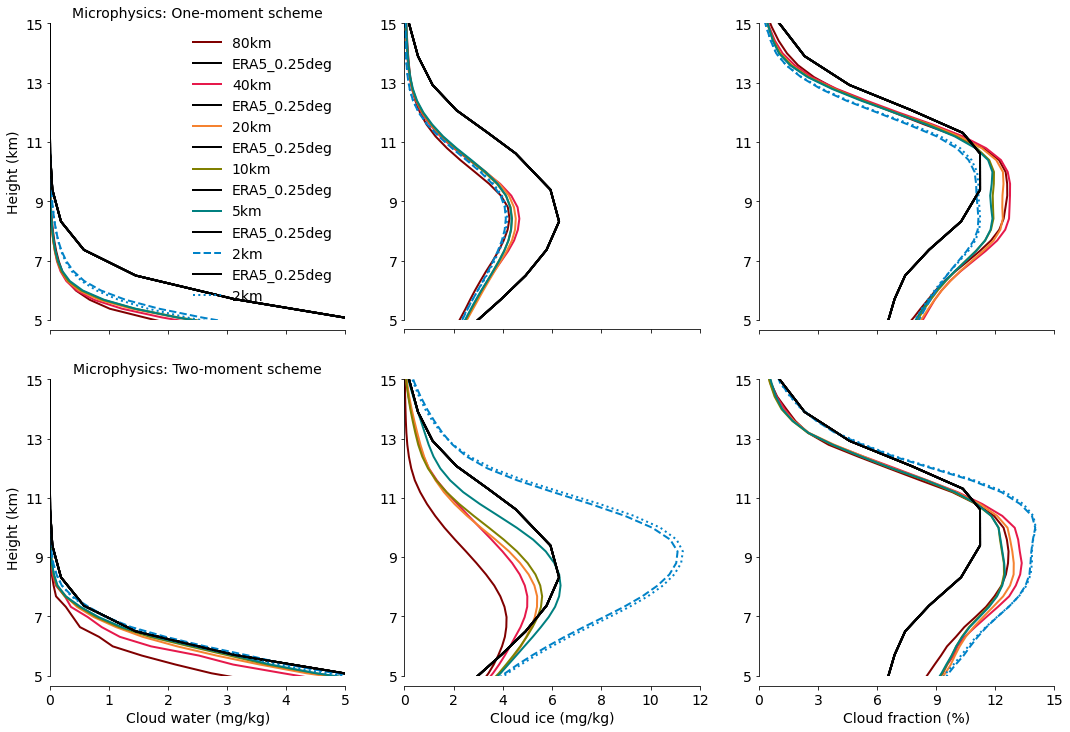

In [27]:


i = 0

fig=plt.figure(figsize=(18,12)) #18,12
ax = fig

for var in ['tot_qc_dia','tot_qi_dia','clc']:
    
    i = i + 1
    
    plot_thmean(ds_list_new, var,i)
    
    plt.savefig('clc-qc-qi_climatology.png', bbox_inches = 'tight', dpi=600)